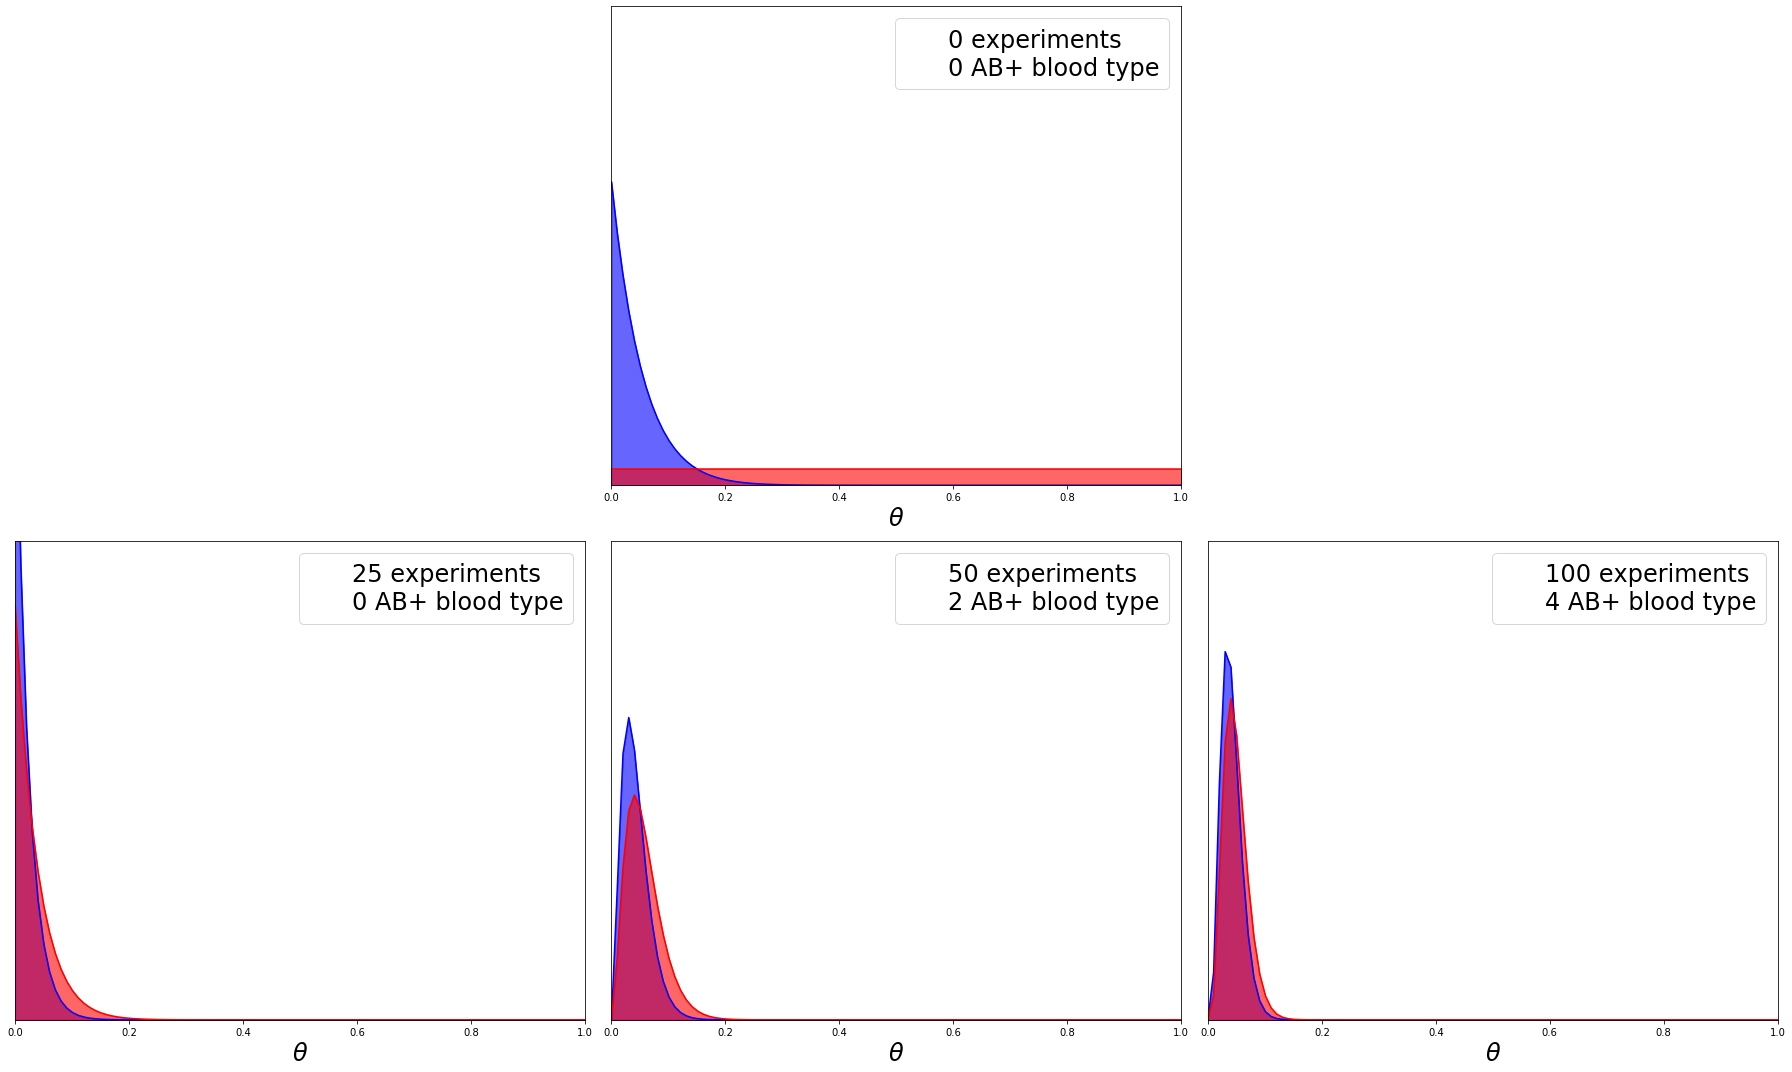

In [3]:
# Adapted from Martin, O 2016, Bayesian Analysis with Python, Packt Publishing, Birmingham, UK
# Generation of the posterior distribution of blood type AB+ among Irish civil servants based on a uniform prior
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

trials = [0, 25, 50, 100] 
data = [0, 0, 2, 4]

# Beta parameters: (1, 19) for the θ =0.05 prior and (1, 1) for the uniform prior
beta_params = [(1, 19), (1, 1)]

# Set the pdf to be the Beta distribution 
dist = stats.beta 

# Return 100 evenly spaced numbers over the interval 0 to 1 
x = np.linspace(0, 1, 100) 

# Set the parameters for the plot
params = {'legend.fontsize': 24, 'legend.handlelength': 1}
plt.rcParams.update(params)
plt.figure(figsize=(25,15))

# enumerate creates a set of tuples (index, the corresponding entry from trials) and index is assgined to idx 
# while the corresponding entry from trials is assigned to N
for idx, N in enumerate(trials):   
    if idx == 0:         
        plt.subplot(2,3, 2)
    else:         
        plt.subplot(2,3, idx+3)     
    y = data[idx]
    
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r')): 
        
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y) 
        
        plt.plot(x, p_theta_given_y, c)         
        
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)
        
        
    plt.plot(0, 0, label="{:d} experiments\n{:d} AB+ blood type".format(N, y), alpha=0)     
    plt.xlim(0,1)     
    plt.ylim(0,30)     
    plt.xlabel(r'$\theta$', fontsize = 24)                         
    plt.legend()     
    plt.gca().axes.get_yaxis().set_visible(False) 
    
plt.tight_layout()
